In [1]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Carregando os dados no data frame Os dados usualmente lida com os dados separados por virgula (Arquivos CSV)
titanic = pd.read_csv('https://raw.githubusercontent.com/EdgarNoda/INTI6-2024/main/datasets/Titanic/train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Verificando os tipos de dados
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Verificando os dados nulos
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Eliminando os dados nulos da tabela Embarked, visto que são passageiros que estão ausentes
titanic = titanic.dropna(subset=['Embarked'])

In [6]:
# Verificando os dados nulos de Embarked
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Eliminando dados menos relevantes
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
# Visualizando que agora não as tabalas de daddos eliminados anteriormente
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Unindo dois dados (SibSp & Parch) para formar o dados de família
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

In [10]:
# Visualizando a nova junção de dados feitos anteriormente
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [11]:
# Atualizando a tabela de visualização para ter somente as tabelas Survived, Pclass, Sex, Age, Fare, Embarked, Family
titanic.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']].head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [12]:
# Preenche os valores ausentes na coluna 'Age' com a mediana da coluna 'Age'
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

<ipython-input-12-81384cd4306d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


<Axes: >

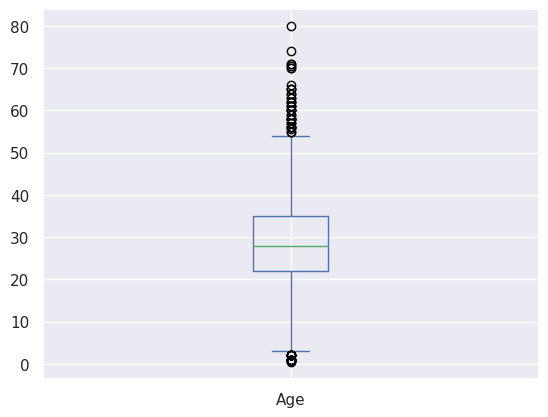

In [13]:
# Visualização do gráfico boxplot
titanic.Age.plot.box()

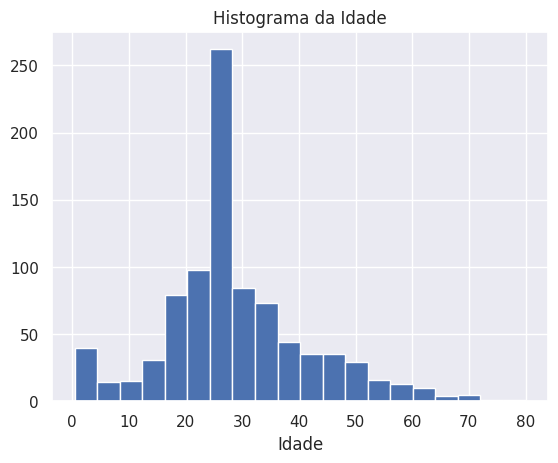

In [14]:
# Gráfico de Histograma para idade
plt.hist(titanic['Age'], bins=20)
plt.xlabel('Idade')
plt.title('Histograma da Idade')
plt.show()

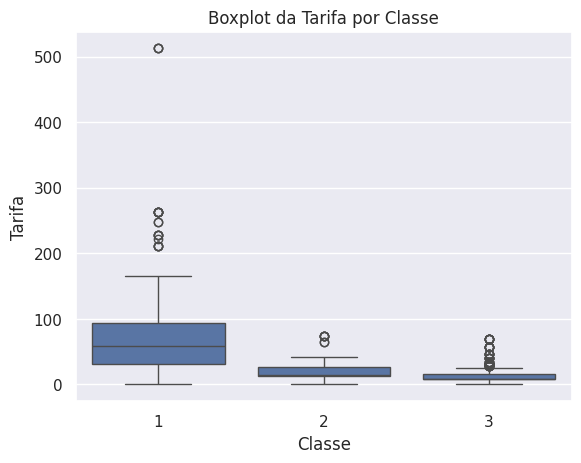

In [15]:
# Gráfico Boxplot para a tarifa por classe
sns.boxplot(x='Pclass', y='Fare', data = titanic)
plt.xlabel('Classe')
plt.ylabel('Tarifa')
plt.title('Boxplot da Tarifa por Classe')
plt.show()

In [16]:
# Verificando que não há valores nulos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Family    889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [17]:
# Calcula a taxa de sobrevivência para passageiros com família
survival_rate_with_family = titanic[titanic['Family'] > 0]['Survived'].mean()

# Calcula a taxa de sobrevivência para passageiros sem família
survival_rate_without_family = titanic[titanic['Family'] == 0]['Survived'].mean()

# Exibe as taxas de sobrevivência
print(f"Taxa de sobrevivência com família: {survival_rate_with_family:.2f}")
print(f"Taxa de sobrevivência sem família: {survival_rate_without_family:.2f}")

Taxa de sobrevivência com família: 0.51
Taxa de sobrevivência sem família: 0.30


In [18]:
# Cria um dicionário com as taxas de sobrevivência para passageiros com e sem família
survival_rates = {
    'Com Família': survival_rate_with_family,
    'Sem Família': survival_rate_without_family
}

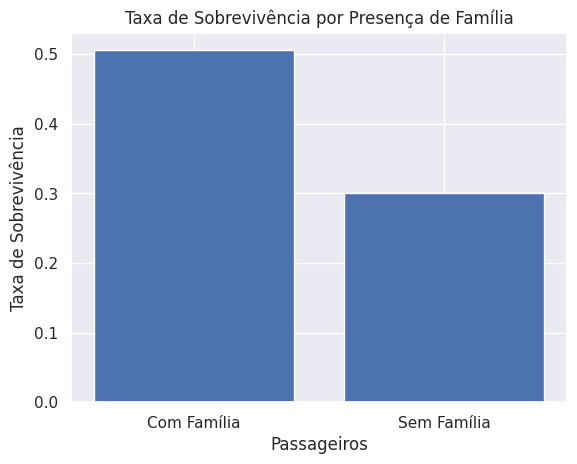

In [19]:
# Cria um gráfico de barras para comparar as taxas de sobrevivência
plt.bar(survival_rates.keys(), survival_rates.values())
plt.xlabel('Passageiros')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Presença de Família')
plt.show()

In [20]:
# Agrupa os dados por classe social e calcula a taxa de sobrevivência para cada classe
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean()

# Exibe as taxas de sobrevivência por classe
print(survival_rate_by_class)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


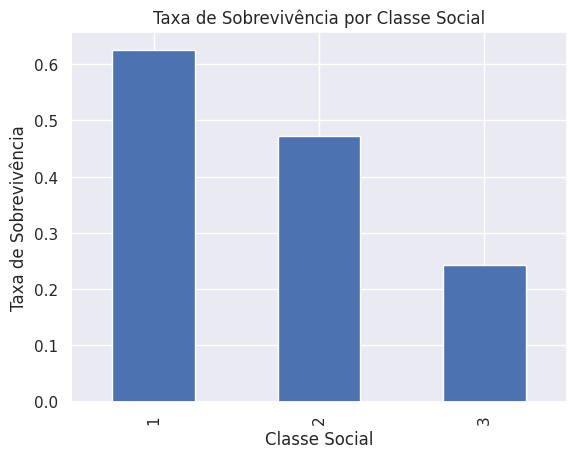

In [21]:
# Gráfico de barras da taxa de sobrevivência por classe
survival_rate_by_class.plot(kind='bar')
plt.xlabel('Classe Social')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência por Classe Social')
plt.show()

In [22]:
# Pré-processamento dos dados
# Converter colunas categóricas para numéricas
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])
titanic['Embarked'].fillna('S', inplace=True)
titanic['Embarked'] = LabelEncoder().fit_transform(titanic['Embarked'])

<ipython-input-22-d2ceebed6324>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna('S', inplace=True)


In [25]:
# Remover valores ausentes
titanic = titanic.dropna()

# Separar as features e a variável alvo
X = titanic[['Pclass', 'Age', 'Fare', 'Sex', 'Embarked']]
y = titanic['Survived']

In [26]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciar e treinar o modelo de Random Forest
rf_titanic = RandomForestClassifier(n_estimators=100, random_state=42)
rf_titanic.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Fazer previsões e avaliar o modelo
y_pred_titanic = rf_titanic.predict(X_test)
print("Acurácia (Titanic):", accuracy_score(y_test, y_pred_titanic))
print("Matriz de Confusão (Titanic):\n", confusion_matrix(y_test, y_pred_titanic))
print("Relatório de Classificação (Titanic):\n", classification_report(y_test, y_pred_titanic))

Acurácia (Titanic): 0.7902621722846442
Matriz de Confusão (Titanic):
 [[140  27]
 [ 29  71]]
Relatório de Classificação (Titanic):
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       167
           1       0.72      0.71      0.72       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [24]:
titanic.to_csv('titanic_adjusted.csv', index=False)